In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read dataset and print its row count
titanic=pd.read_csv('train.csv')
rows=len(titanic)
print('Total number of observations:', rows)

Total number of observations: 891


In [3]:
#initial look
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#survival counts, 1=survived
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
#sex counts
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

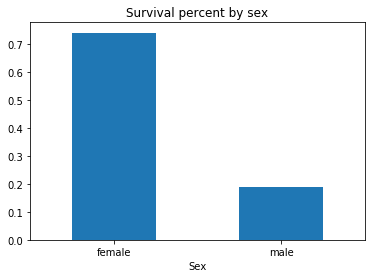

In [6]:
#plot survival percent by sex
survival_sex=titanic.groupby('Sex')['Survived'].agg(['sum','size']).reset_index()
survival_sex['Survived%']=survival_sex['sum']/survival_sex['size']
survival_sex.drop(['sum','size'],axis=1,inplace=True)
survival_sex.plot.bar(x='Sex',rot=0,title='Survival percent by sex',legend=False)

In [7]:
#age stats
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

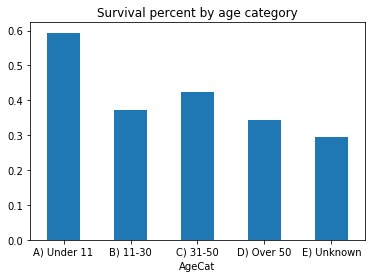

In [8]:
#plot survival percent by age category
survival_age=titanic[['Age','Survived']].copy(deep=False)

#create age category as dataframe column
survival_age.loc[survival_age.Age < 11,'AgeCat']='A) Under 11'
survival_age.loc[(survival_age.Age > 10)&(survival_age.Age < 31),'AgeCat']='B) 11-30'
survival_age.loc[(survival_age.Age > 30)&(survival_age.Age < 51),'AgeCat']='C) 31-50'
survival_age.loc[survival_age.Age > 50,'AgeCat'] = 'D) Over 50'
survival_age.loc[survival_age.Age.isna(),'AgeCat']='E) Unknown'
survival_age=survival_age[['AgeCat','Survived']].copy(deep=False)

#summarize and display plot
survival_age=survival_age.groupby('AgeCat')['Survived'].agg(['sum','size']).reset_index()
survival_age['Survived%']=survival_age['sum']/survival_age['size']
survival_age.drop(['sum','size'],axis=1,inplace=True)
survival_age.plot.bar(x='AgeCat',rot=0,title='Survival percent by age category',legend=False)

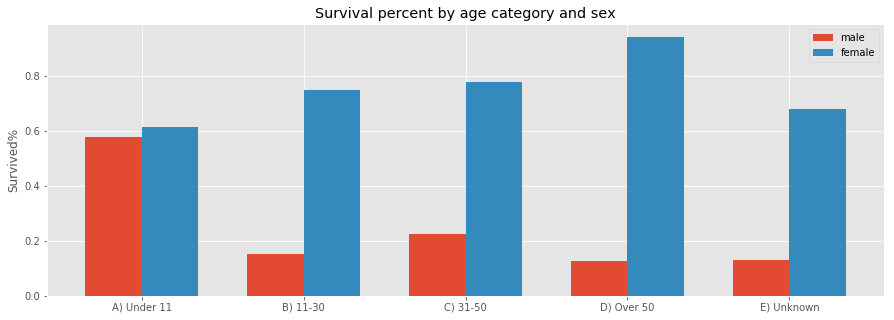

In [9]:
#plot survival percent by age category and sex
survival_age=titanic[['Age','Sex','Survived']].copy(deep=False)

#create age category as dataframe column
survival_age.loc[survival_age.Age < 11,'AgeCat']='A) Under 11'
survival_age.loc[(survival_age.Age > 10)&(survival_age.Age < 31),'AgeCat']='B) 11-30'
survival_age.loc[(survival_age.Age > 30)&(survival_age.Age < 51),'AgeCat']='C) 31-50'
survival_age.loc[survival_age.Age > 50,'AgeCat'] = 'D) Over 50'
survival_age.loc[survival_age.Age.isna(),'AgeCat']='E) Unknown'
survival_age=survival_age[['AgeCat','Sex','Survived']].copy(deep=False)

#summarize
survival_age=survival_age.groupby(['AgeCat','Sex'])['Survived'].agg(['sum','size']).reset_index()
survival_age['Survived%']=survival_age['sum']/survival_age['size']
survival_age.drop(['sum','size'],axis=1,inplace=True)

#plot prep
N=survival_age.AgeCat.nunique()
ind=np.arange(N)
width=0.35
#female results
female=survival_age.loc[survival_age.Sex=='female']
female=female['Survived%']
female=female.values
female=tuple(female)
#male results
male=survival_age.loc[survival_age.Sex=='male']
male=male['Survived%']
male=male.values
male=tuple(male)
#age category labels
labels=survival_age.AgeCat.unique()
labels=tuple(labels)

#display plot
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.bar(ind, male, width, label='male')
plt.bar(ind + width, female, width, label='female')
plt.ylabel('Survived%')
plt.title('Survival percent by age category and sex')
plt.xticks(ind + width / 2, labels)
plt.legend(loc='best')